# SQL Challenge: Build a Data Mart

You are a data engineer at Contentful, responsible for supporting analytics on customer feature usage across different regions. Customers from both Europe and the US activate product features with defined usage limits. Their feature usage is tracked daily via **snapshot** records.

Your task is to materialize a data mart that will simplifies and accelerates analytical queries on this dataset.

## Source Schema

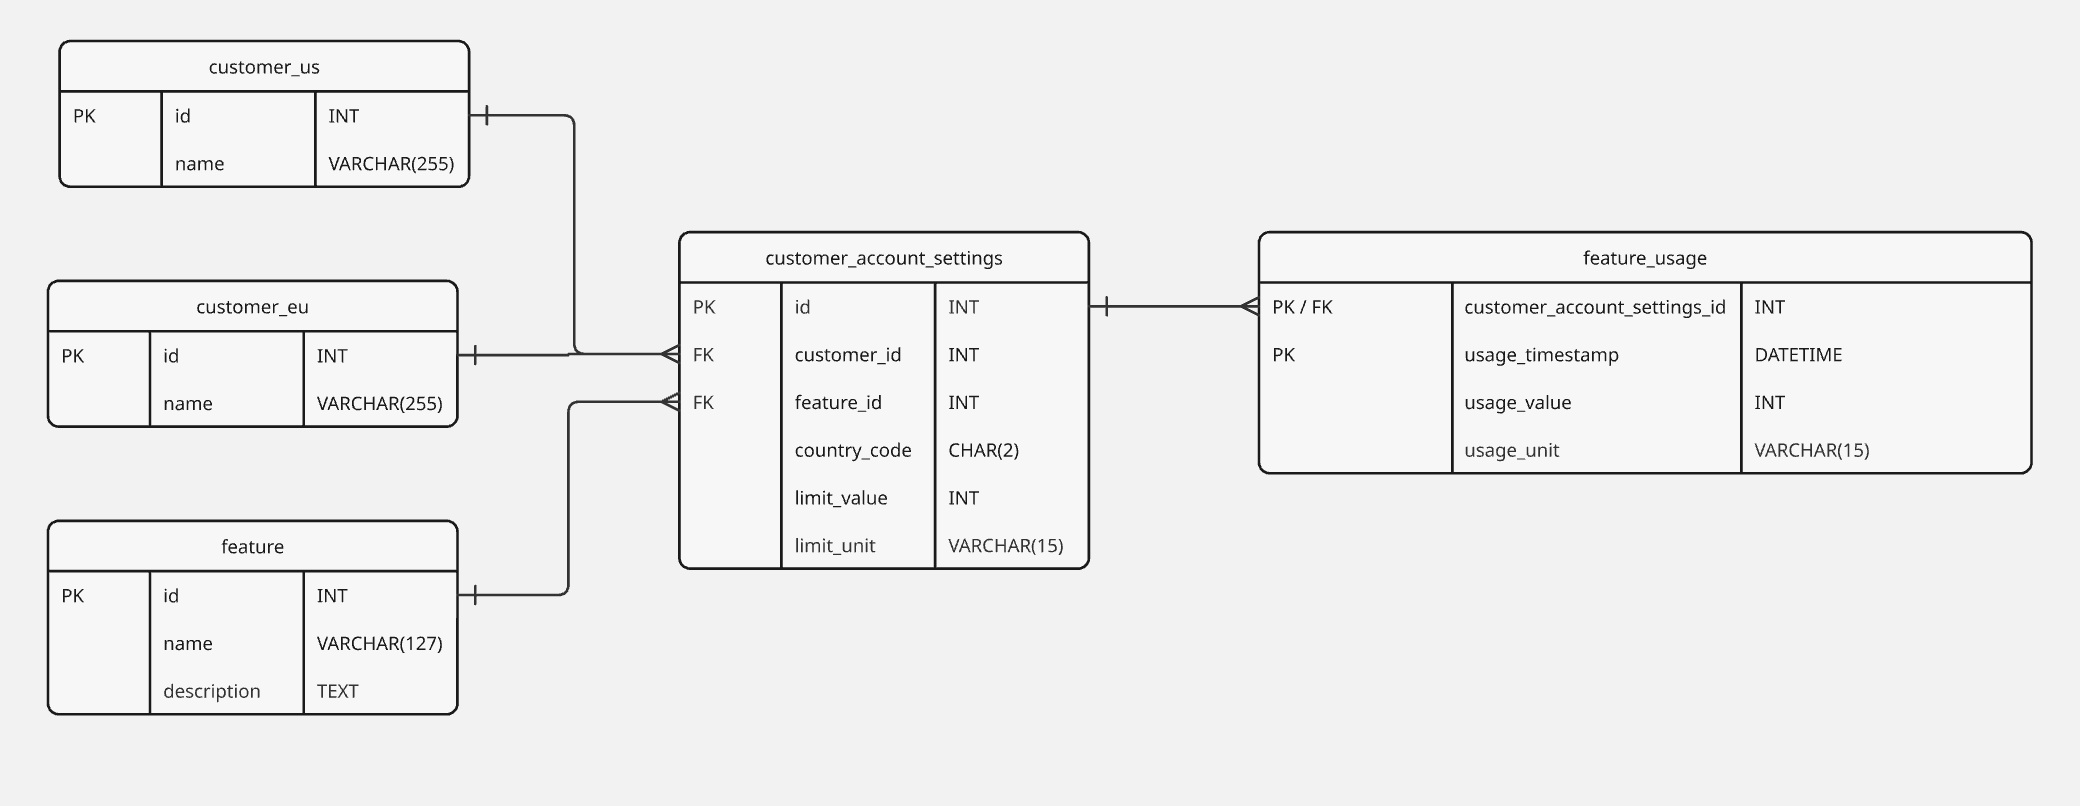

## Target Schema

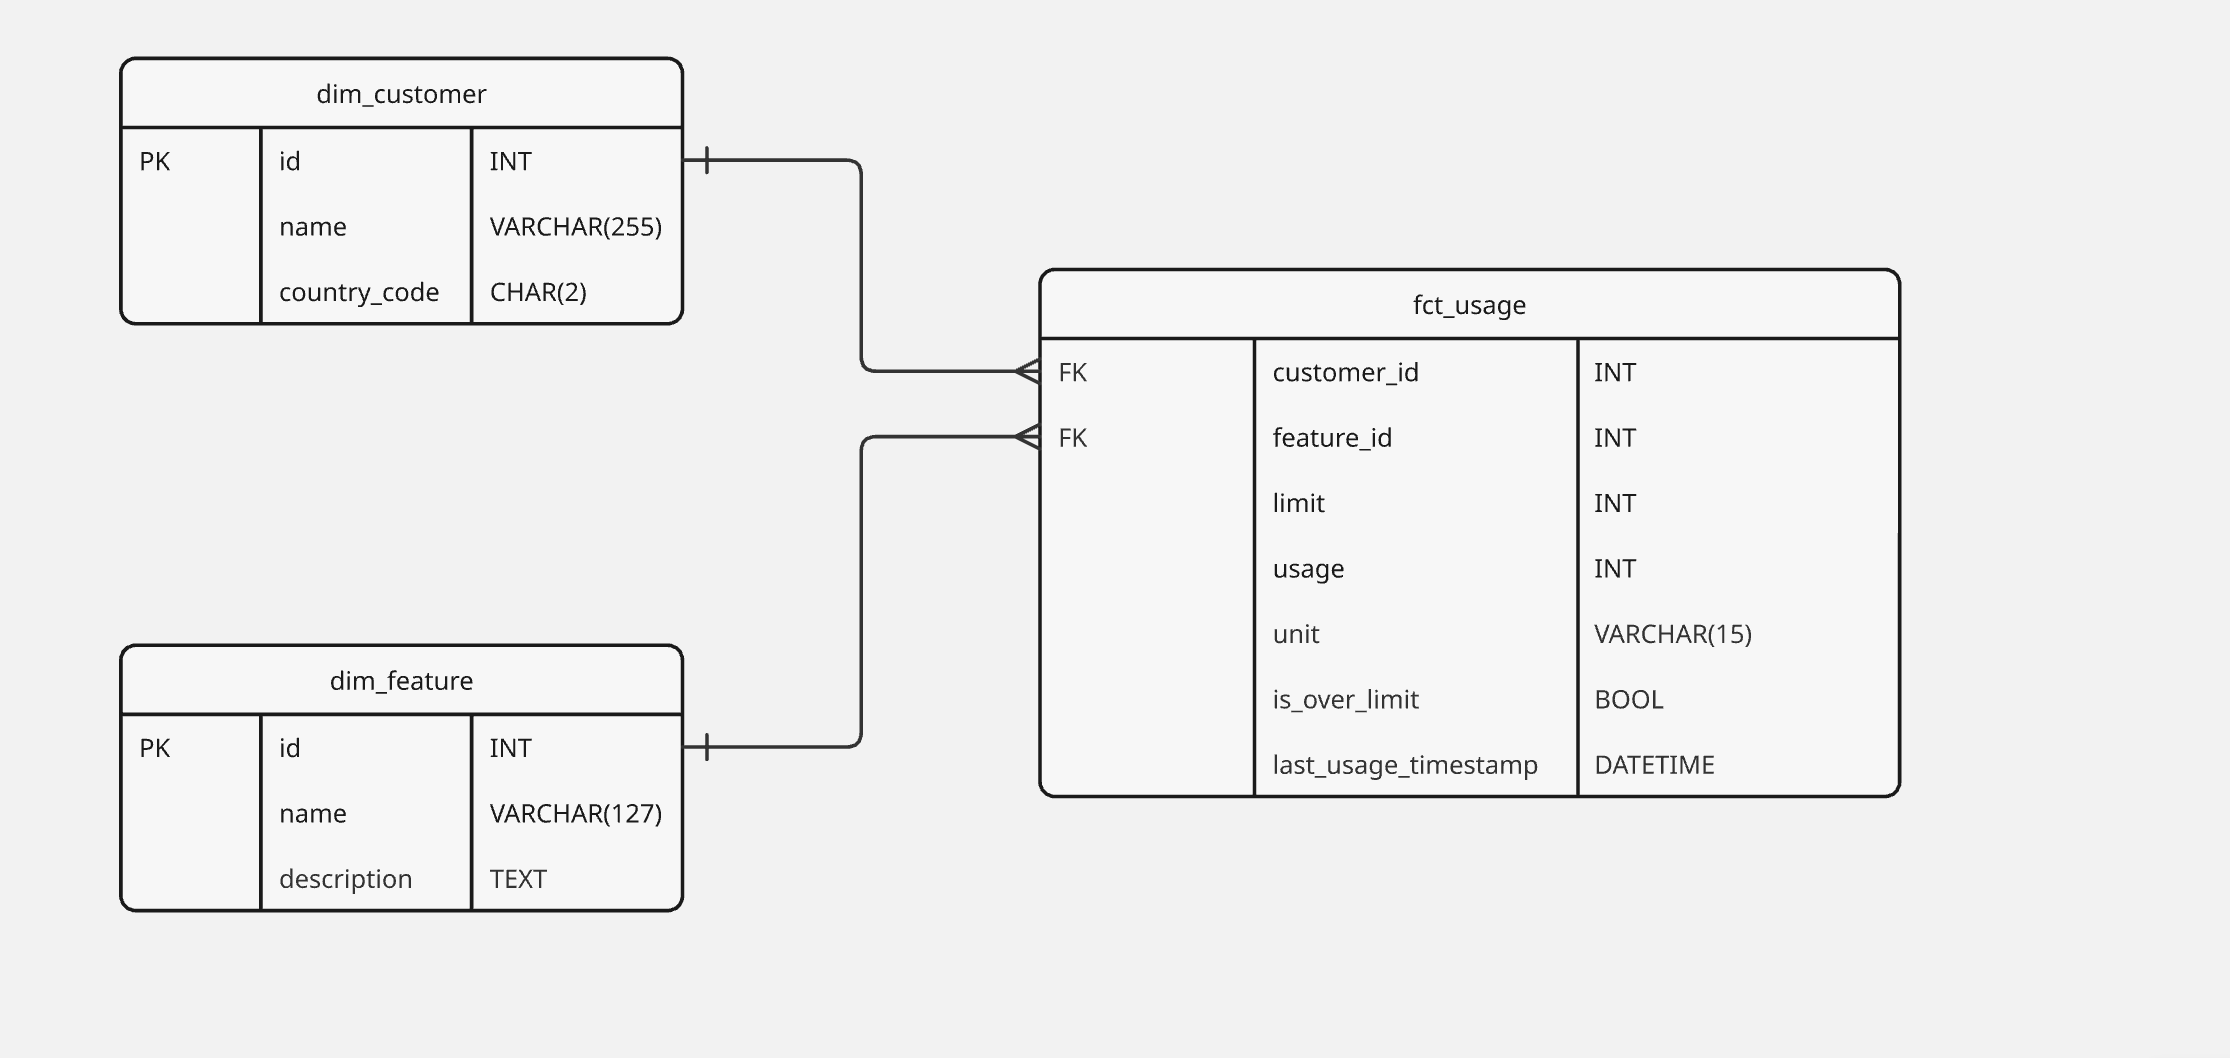



# 1. Initialize the project
You can run code by pressing ▶ in the toolbar menu, or by hitting shift + Enter. Do it with the cell below!

In [ ]:
import duckdb
import pandas as pd

%reload_ext sql

%config SqlMagic.autopandas=True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:////tmp/database.duckdb

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from sqlalchemy import create_engine
import pandas as pd

# Create DuckDB engine
engine = create_engine('duckdb:////tmp/database.duckdb')

queries = {
    "Customer EU": "SELECT * FROM customer_eu;",
    "Customer US": "SELECT * FROM customer_us;",
    "Feature": "SELECT * FROM feature;",
    "Customer Account Settings": "SELECT * FROM customer_account_settings;",
    "Feature Usage": "SELECT * FROM feature_usage;",
}

tab_contents = []
tab_titles = []

with engine.connect() as con:
    raw_con = con.connection
    for title, sql in queries.items():
        df = raw_con.execute(sql).fetchdf()
        out = widgets.Output()
        with out:
            display(df)
        tab_contents.append(out)
        tab_titles.append(title)

# Create and display the tabs
tabs = widgets.Tab(children=tab_contents)
for i, title in enumerate(tab_titles):
    tabs.set_title(i, title)

display(tabs)


# 2. Intermediate Layer
This layer handles complex logic by breaking down transformations into manageable steps.

In [ ]:
%%sql


# 3. Mart Layer
This layer is used to create denormalized, analysis-ready datasets for reporting and analytics.

In [ ]:
%%sql 
